# 🌌 Master Notebook – Pipeline Spectroscopie DR5

## Objectif du pipeline

- Ce notebook télécharge, prépare et journalise des spectres .fits.gz de LAMOST DR5 pour entraîner un modèle de classification.
- Le DatasetBuilder garantit qu'aucun spectre ne sera jamais réutilisé en s'appuyant sur un log de fichiers déjà traités.
- Ce pipeline permet d’ajouter progressivement des spectres au jeu d’entraînement, en assurant qu’aucun spectre ne soit traité deux fois. Chaque exécution sélectionne un nouveau lot, l’entraîne, puis marque les spectres comme utilisés.


#

## Étape 0 : SETUP & IMPORTS

In [1]:
from utils import setup_project_env
from pipeline.master import MasterPipeline

# Initialisation automatique de l'environnement et des chemins
paths = setup_project_env()

# Instanciation du pipeline maître
pipeline = MasterPipeline(
    raw_data_dir=paths["RAW_DATA_DIR"],
    catalog_dir=paths["CATALOG_DIR"],
    processed_dir=paths["PROCESSED_DIR"],
    models_dir=paths["MODELS_DIR"],
    reports_dir=paths["REPORTS_DIR"],
)

print("\nSetup terminé. Tu es prêt à lancer ton pipeline.")

[INFO] Racine du projet détectée : c:\Users\alexb\Documents\Google_Cloud\alex_labs_google_sprint\astro_spectro_git
[INFO] Dossier 'src' ajouté au sys.path.

Setup terminé. Tu es prêt à lancer ton pipeline.


#

## Faire fonctionner la pipeline d'un début à la fin

Lancer la cellule ci-bas pour faire fonctionner la pipeline au complet d'une seule ligne de commande, sinon suivre plus bas pour faire étape par étape!

In [ ]:
pipeline.run_full_pipeline(batch_size=1000, strategy="random", n_estimators=100)

#

## 1) Téléchargement des spectres
Utilisation du script ``dr5_downloader.py`` encapsulé en fonction.

Cette étape est désormais externalisée dans [01_download_spectra.ipynb](./01_download_spectra.ipynb) pour être exécutée seulement au besoin.

#

## 2) Préparation des données spectrales : Sélection du lot de spectres à traiter
- Le DatasetBuilder sélectionne un lot de nouveaux spectres jamais utilisés.
- Si tous les spectres disponibles ont déjà été utilisés, le pipeline s'arrête proprement.


In [2]:
print("\n=== ÉTAPE 2 : CRÉATION D'UN NOUVEAU LOT DE SPECTRES NON DÉJÀ UTILISÉS ===")

# Pour définir la grosseur du lot modifier la variable de batch_size= par la valeur voulu
pipeline._select_batch(batch_size=500)


=== ÉTAPE 2 : CRÉATION D'UN NOUVEAU LOT DE SPECTRES NON DÉJÀ UTILISÉS ===

=== ÉTAPE 2 : CRÉATION D'UN NOUVEAU LOT DE SPECTRES NON DÉJÀ UTILISÉS ===
--- Constitution d'un nouveau lot d'entraînement ---
  > 11150 spectres trouvés dans 'c:\Users\alexb\Documents\Google_Cloud\alex_labs_google_sprint\astro_spectro_git\data\raw'
  > 6704 spectres déjà utilisés dans des entraînements précédents.
  > 4446 spectres nouveaux et disponibles pour l'entraînement.
  > Sélection d'un échantillon aléatoire de 500 spectres.

500 nouveaux spectres proposés pour traitement.
Exemple : B6202/spec-55862-B6202_sp03-137.fits.gz


['B6202/spec-55862-B6202_sp03-137.fits.gz',
 'M31_011N40_B1/spec-55863-M31_011N40_B1_sp09-191.fits.gz',
 'B6210/spec-55862-B6210_sp03-023.fits.gz',
 'B6212/spec-55862-B6212_sp02-127.fits.gz',
 'GAC_105N29_B1/spec-55863-GAC_105N29_B1_sp03-222.fits.gz',
 'M31_011N40_B1/spec-55863-M31_011N40_B1_sp02-193.fits.gz',
 'B6212/spec-55862-B6212_sp03-070.fits.gz',
 'GAC_105N29_B1/spec-55863-GAC_105N29_B1_sp06-033.fits.gz',
 'B6202/spec-55862-B6202_sp03-210.fits.gz',
 'GAC_105N29_B1/spec-55863-GAC_105N29_B1_sp06-005.fits.gz',
 'B6210/spec-55862-B6210_sp09-154.fits.gz',
 'B6202/spec-55862-B6202_sp03-184.fits.gz',
 'GAC_105N29_B1/spec-55863-GAC_105N29_B1_sp03-061.fits.gz',
 'B6210/spec-55862-B6210_sp07-186.fits.gz',
 'M31_011N40_M1/spec-55863-M31_011N40_M1_sp09-117.fits.gz',
 'B6212/spec-55862-B6212_sp09-146.fits.gz',
 'M31_011N40_B1/spec-55863-M31_011N40_B1_sp02-168.fits.gz',
 'M31_011N40_M1/spec-55863-M31_011N40_M1_sp11-074.fits.gz',
 'B6210/spec-55862-B6210_sp06-126.fits.gz',
 'B6210/spec-55862-B

#

## 3) parcours ce lot de spectres pour générer un CSV à partir des headers des fichiers ``.fits.gz``
C’est ce CSV qui sera ton ``master_catalog`` local, aligné exactement avec les spectres que tu vas traiter dans ce lot.

In [3]:
print("\n=== ÉTAPE 3 : GÉNÉRATION DU CATALOGUE LOCAL DE HEADERS ===\n")

pipeline._generate_local_catalog()


=== ÉTAPE 3 : GÉNÉRATION DU CATALOGUE LOCAL DE HEADERS ===


=== ÉTAPE 3 : GÉNÉRATION DU CATALOGUE LOCAL DE HEADERS ===

[OK] spec-55862-B6202_sp03-137.fits.gz ajouté au catalogue.
[OK] spec-55863-M31_011N40_B1_sp09-191.fits.gz ajouté au catalogue.
[OK] spec-55862-B6210_sp03-023.fits.gz ajouté au catalogue.
[OK] spec-55862-B6212_sp02-127.fits.gz ajouté au catalogue.
[OK] spec-55863-GAC_105N29_B1_sp03-222.fits.gz ajouté au catalogue.
[OK] spec-55863-M31_011N40_B1_sp02-193.fits.gz ajouté au catalogue.
[OK] spec-55862-B6212_sp03-070.fits.gz ajouté au catalogue.
[OK] spec-55863-GAC_105N29_B1_sp06-033.fits.gz ajouté au catalogue.
[OK] spec-55862-B6202_sp03-210.fits.gz ajouté au catalogue.
[OK] spec-55863-GAC_105N29_B1_sp06-005.fits.gz ajouté au catalogue.
[OK] spec-55862-B6210_sp09-154.fits.gz ajouté au catalogue.
[OK] spec-55862-B6202_sp03-184.fits.gz ajouté au catalogue.
[OK] spec-55863-GAC_105N29_B1_sp03-061.fits.gz ajouté au catalogue.
[OK] spec-55862-B6210_sp07-186.fits.gz ajouté au c

'c:\\Users\\alexb\\Documents\\Google_Cloud\\alex_labs_google_sprint\\astro_spectro_git\\data\\catalog\\master_catalog_temp.csv'

#

## 4) Exploration des features
### Analyse exploratoire des spectres prétraités
Visualiser SNR, distribution de classes, etc.

In [4]:
pipeline._process_batch()


--- ÉTAPE 4 : Lancement du pipeline de traitement ---
  > Catalogue temporaire chargé avec succès (500 entrées).

--- Démarrage du pipeline de traitement pour 500 spectres ---


Traitement des spectres: 100%|██████████| 500/500 [00:01<00:00, 453.85it/s]



Pipeline de traitement terminé. 500 spectres traités et enrichis.

--- Aperçu du dataset de features généré ---
                                              file_path  feature_Hα  feature_Hβ  feature_CaIIK  feature_CaIIH  feature_ratio_CaK_Hbeta  feature_ratio_Halpha_Hbeta                                 fits_name   obsid       plan_id   mjd   class subclass                      filename_original          author data_version       date_creation telescope  longitude_site  latitude_site        obs_date_utc    jd                designation         ra       dec  fiber_id fiber_type object_name catalog_object_type magnitude_type magnitude_u magnitude_g magnitude_r magnitude_i magnitude_z  heliocentric_correction radial_velocity_corr  seeing     redshift  redshift_error  snr_u  snr_g  snr_r  snr_i  snr_z
                B6202/spec-55862-B6202_sp03-137.fits.gz    0.315691    0.616303       0.746871       0.833354                 1.211855                    0.512232         spec-55862-B6202_

,file_path,feature_Hα,feature_Hβ,feature_CaIIK,feature_CaIIH,feature_ratio_CaK_Hbeta,feature_ratio_Halpha_Hbeta,fits_name,obsid,plan_id,...,heliocentric_correction,radial_velocity_corr,seeing,redshift,redshift_error,snr_u,snr_g,snr_r,snr_i,snr_z
0,B6202/spec-55862-B6202_sp03-137.fits.gz,0.315691,0.616303,0.746871,0.833354,1.211855,0.512232,spec-55862-B6202_sp03-137.fits.gz,703137,B6202,...,True,UNKNOWN,2.6,-0.000034,0.000022,5.04,41.45,60.99,86.66,61.83
1,M31_011N40_B1/spec-55863-M31_011N40_B1_sp09-19...,0.403628,0.948610,2.440987,1.149384,2.573221,0.425494,spec-55863-M31_011N40_B1_sp09-191.fits.gz,1609191,M31_011N40_B1,...,True,UNKNOWN,2.8,-0.000223,0.000054,1.34,10.03,15.56,18.89,9.93
2,B6210/spec-55862-B6210_sp03-023.fits.gz,1.465320,0.889097,0.870424,1.453758,0.978997,1.648098,spec-55862-B6210_sp03-023.fits.gz,803023,B6210,...,True,UNKNOWN,2.4,-0.000071,0.000019,0.72,6.33,15.79,25.52,19.07
3,B6212/spec-55862-B6212_sp02-127.fits.gz,0.848268,1.024849,4.678543,3.630470,4.565101,0.827699,spec-55862-B6212_sp02-127.fits.gz,902127,B6212,...,True,UNKNOWN,2.8,-9999.000000,-9999.000000,0.76,3.88,2.99,2.59,2.11
4,GAC_105N29_B1/spec-55863-GAC_105N29_B1_sp03-22...,0.756946,1.021185,2.930395,1.359110,2.869599,0.741242,spec-55863-GAC_105N29_B1_sp03-222.fits.gz,1503222,GAC_105N29_B1,...,True,UNKNOWN,2.8,-0.000175,0.000027,0.27,6.60,9.52,13.32,9.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,GAC_105N29_B1/spec-55863-GAC_105N29_B1_sp15-24...,0.399430,0.588387,1.872327,1.126574,3.182132,0.678856,spec-55863-GAC_105N29_B1_sp15-245.fits.gz,1515245,GAC_105N29_B1,...,True,UNKNOWN,2.8,0.000256,0.000054,2.19,12.02,18.38,23.41,13.02
496,B6202/spec-55862-B6202_sp05-115.fits.gz,0.347567,0.632958,1.339264,1.033600,2.115880,0.549115,spec-55862-B6202_sp05-115.fits.gz,705115,B6202,...,True,UNKNOWN,2.6,-0.000075,0.000032,2.28,30.31,40.93,59.93,40.60
497,M31_011N40_M1/spec-55863-M31_011N40_M1_sp12-07...,0.471470,1.165242,8.329804,4.431366,7.148556,0.404611,spec-55863-M31_011N40_M1_sp12-073.fits.gz,1712073,M31_011N40_M1,...,True,UNKNOWN,2.8,-9999.000000,-9999.000000,0.09,1.01,3.32,7.45,5.54
498,B6212/spec-55862-B6212_sp09-220.fits.gz,0.368841,0.443585,0.799396,1.215663,1.802121,0.831498,spec-55862-B6212_sp09-220.fits.gz,909220,B6212,...,True,UNKNOWN,2.8,-0.000266,0.000024,1.14,11.95,30.09,42.15,31.27


#

## 5) Entraînement du modèle
### Machine Learning
Sélection des features et entraînement d'un modèle de classification.

#


=== ÉTAPE 5 : ENTRAÎNEMENT DU CLASSIFICATEUR AVEC 175 ESTIMATEURS ===


--- ÉTAPE 5 : Entraînement et Évaluation du modèle ---
--- Chargement du dataset : features_20250730T190600Z.csv ---
  > 87 lignes avec des labels invalides ou nuls supprimées.
  > Suppression des classes trop rares : ['D', 'W', 'B']

Features utilisées : ['feature_Hα', 'feature_Hβ', 'feature_CaIIK', 'feature_CaIIH', 'feature_ratio_CaK_Hbeta', 'feature_ratio_Halpha_Hbeta']
Nombre d'échantillons final : 410, Nombre de features : 6
  > Entraînement du modèle sur 307 échantillons...
  > Modèle entraîné.

--- Rapport d'Évaluation ---
              precision    recall  f1-score   support

           A       0.80      0.50      0.62         8
           F       0.36      0.39      0.38        23
           G       0.50      0.53      0.51        34
           K       0.58      0.62      0.60        24
           M       0.45      0.36      0.40        14

    accuracy                           0.50       103
   macro av

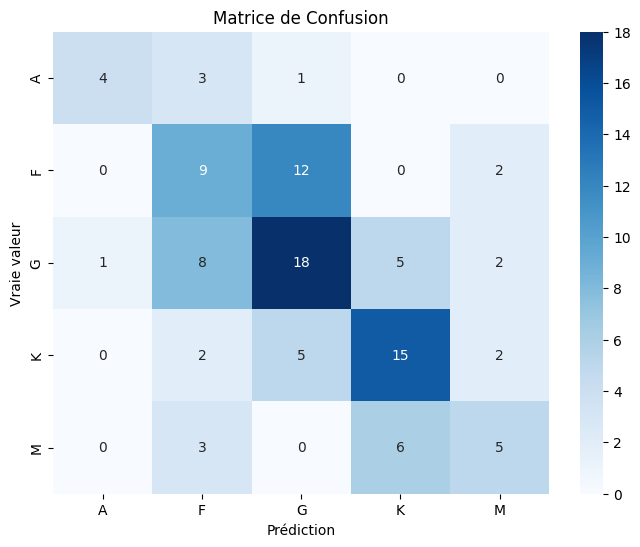

  > Modèle sauvegardé dans : c:\Users\alexb\Documents\Google_Cloud\alex_labs_google_sprint\astro_spectro_git\data\models\spectral_classifier.pkl

--- ÉTAPE 6 : Mise à jour du Journal des Spectres Utilisés ---

  > Aucun nouveau spectre à ajouter : tous étaient déjà dans le log.

--- ÉTAPE 7 : Génération du Rapport de Session ---
  > Hash MD5 du modèle : c1b867ef3b7fd022cdeb0374c71c4a92
  > Métriques extraites : Accuracy = 0.50

Rapport de session sauvegardé dans : c:\Users\alexb\Documents\Google_Cloud\alex_labs_google_sprint\astro_spectro_git\data\reports\session_report_20250730T191821Z.json


SESSION DE RECHERCHE TERMINÉE


'c:\\Users\\alexb\\Documents\\Google_Cloud\\alex_labs_google_sprint\\astro_spectro_git\\data\\reports\\session_report_20250730T191821Z.json'

In [2]:
n_estimators = 175  # Nombre d'estimateurs pour le classifieur
print(f"\n=== ÉTAPE 5 : ENTRAÎNEMENT DU CLASSIFICATEUR AVEC {n_estimators} ESTIMATEURS ===\n")
clf, feature_cols, X, y, processed_files = pipeline._train_and_evaluate(n_estimators=n_estimators)
pipeline._log_and_report(clf, feature_cols, X, y, processed_files, n_estimators=n_estimators)

#